In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)
sns.set_style('whitegrid')

In [3]:
df= pd.read_csv('./data/marketing_campaign.csv')
display(df.head(5))
print(df.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


(2240, 29)


In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
# Fill the NaN values of income with mean income
avg = df['Income'].mean()
df['Income'] = df['Income'].fillna(avg)
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
print(df['Dt_Customer'].dtype)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
print(df['Dt_Customer'].dtype)

object
datetime64[ns]


In [9]:
df['Age'] = 2021-df['Year_Birth']
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67


In [10]:
df['Age'].describe()

count    2240.000000
mean       52.194196
std        11.984069
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

<AxesSubplot: xlabel='Age'>

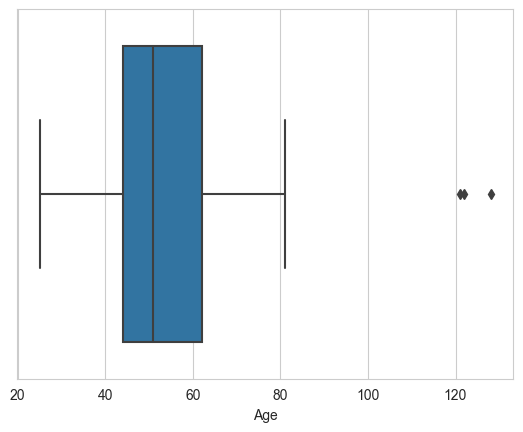

In [11]:
sns.boxplot(data = df, x = 'Age')

In [12]:
# Outliers in Age column
df[(df['Age']> 85)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0,121
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0,128
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0,122


In [13]:
df = df[~(df['Age']> 85)] # remove the outliers

In [14]:
df.shape

(2237, 30)

<AxesSubplot: xlabel='Income'>

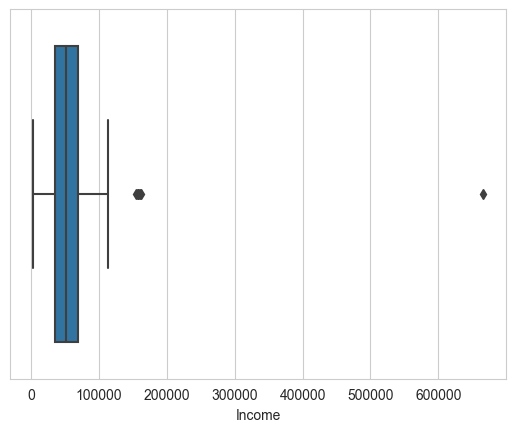

In [15]:
sns.boxplot(data = df, x = 'Income')

In [16]:
df = df[~(df['Income'] > 165000)] # removing the outliers

In [17]:
df['Income'].describe()

count      2236.000000
mean      51961.906544
std       21411.404811
min        1730.000000
25%       35502.500000
50%       51684.000000
75%       68275.750000
max      162397.000000
Name: Income, dtype: float64

In [18]:
df.loc[(df['Age'] >= 13) & (df['Age'] <= 19), 'AgeGroup'] = 'Teen'
df.loc[(df['Age'] >= 20) & (df['Age']<= 39), 'AgeGroup'] = 'Young Adult'
df.loc[(df['Age'] >= 40) & (df['Age'] <= 59), 'AgeGroup'] = 'Middle Age Adult'
df.loc[(df['Age'] > 60), 'AgeGroup'] = 'Senior Adult'
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AgeGroup
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,Senior Adult
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,Senior Adult


In [19]:
df['Month_customer']=(2015 - df['Dt_Customer'].dt.year)*12 +(1- df['Dt_Customer'].dt.month)
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AgeGroup,Month_customer
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,Senior Adult,28
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,Senior Adult,10


In [20]:
df['Marital_Status']= df['Marital_Status'].replace(['Together', 'Married'], 'Partner')
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Widow', 'Alone','Absurd', 'YOLO'], 'Single')
df['Marital_Status'].value_counts()

Partner    1442
Single      794
Name: Marital_Status, dtype: int64

In [21]:
df['Children'] = df['Kidhome'] + df['Teenhome']
df.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,AgeGroup,Month_customer,Children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,64,Senior Adult,28,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,67,Senior Adult,10,2


In [22]:
#Feature for total members in the householde
df["Family_Size"] = df['Marital_Status'].replace({"Single": 1, "Partner":2})+ df["Children"]

df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate",
                                             "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat",
                          "MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

df['Total_spending']= df[[ 'Wines','Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum(axis = 1)

df['NumAllPurchases'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

df['TotalAcceptedCmp'] = df['AcceptedCmp1']+df['AcceptedCmp2']+df['AcceptedCmp3']+df['AcceptedCmp4']+df['AcceptedCmp5']+df['Response']
# df['ActiveDays'] = df['Days_is_client'] - df['Recency']

#Dropping some of the redundant features
to_drop = ["Year_Birth", "Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID"]
df = df.drop(to_drop, axis=1)

In [23]:
df[(df['NumAllPurchases'] == 0)]

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,AgeGroup,Month_customer,Children,Family_Size,Is_Parent,Total_spending,NumAllPurchases,TotalAcceptedCmp
655,Graduate,153924.0,0,0,81,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,46,Middle Age Adult,11,0,1,0,6,0,0
981,Graduate,4861.0,0,0,20,2,1,1,1,0,1,0,0,0,0,14,0,0,0,0,0,0,0,56,Middle Age Adult,7,0,1,0,6,0,0
1245,Graduate,1730.0,0,0,65,1,1,3,1,1,1,15,0,0,0,20,0,0,0,0,0,0,0,50,Middle Age Adult,8,0,1,0,8,0,0
1524,Graduate,3502.0,1,0,56,2,1,1,0,0,1,0,0,0,0,14,0,0,0,0,0,0,0,48,Middle Age Adult,21,1,2,1,5,0,0
1846,Postgraduate,4023.0,1,1,29,5,0,1,1,1,1,15,0,0,0,19,0,0,0,0,0,0,0,58,Middle Age Adult,7,2,4,1,9,0,0
2132,Postgraduate,156924.0,0,0,85,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,72,Senior Adult,17,0,2,0,8,0,0


In [24]:
df = df[~(df['NumAllPurchases'] == 0)]

In [ ]:
df.shape

<AxesSubplot: >

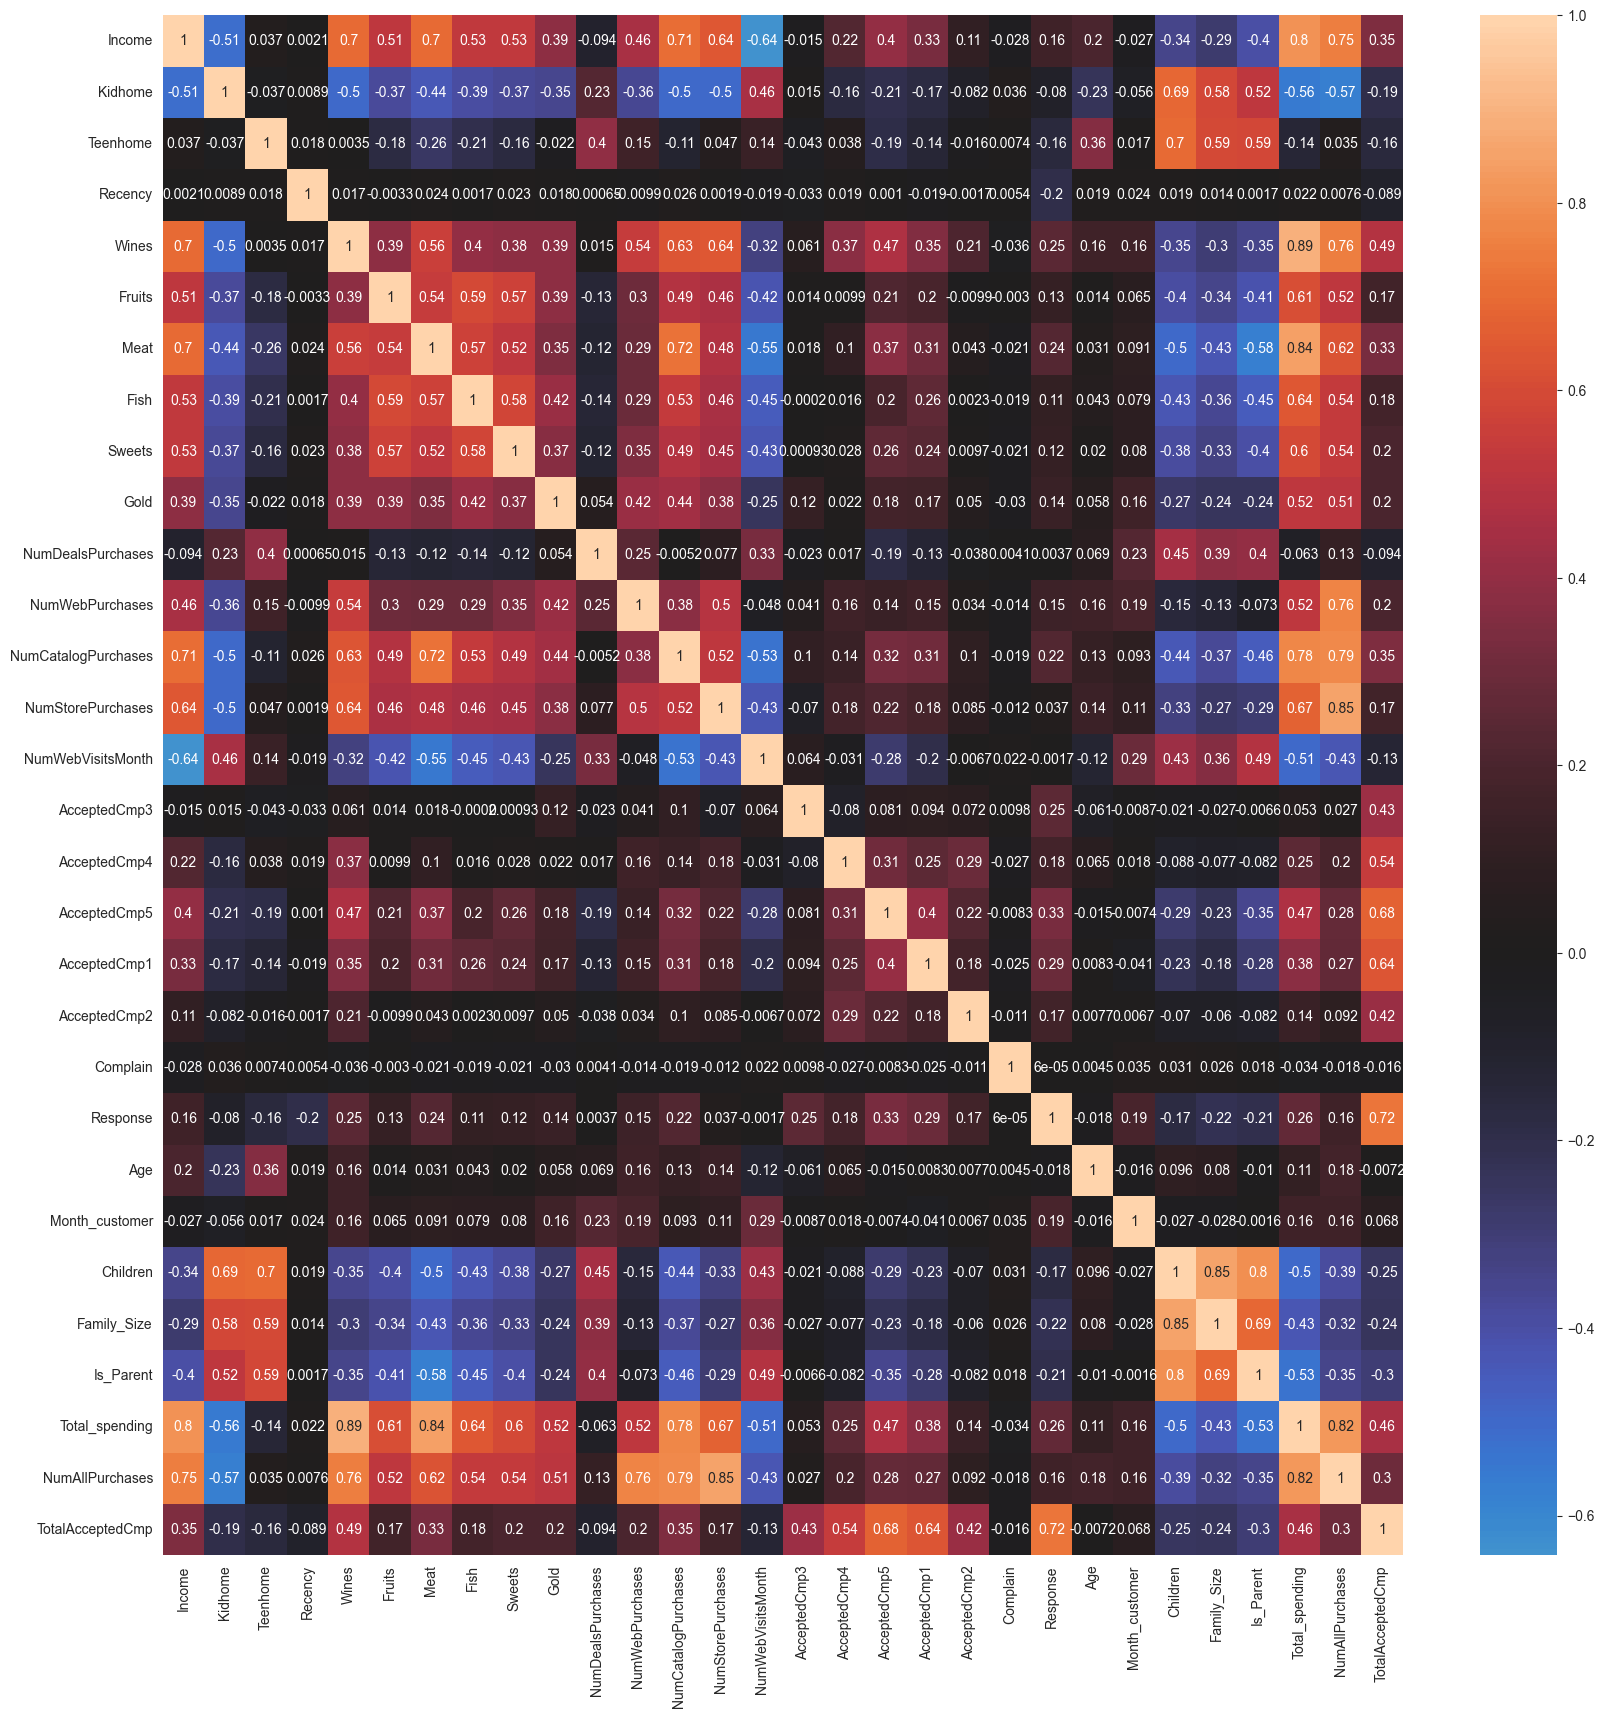

In [25]:
#correlation matrix

plt.figure(figsize=(20,20))  
sns.heatmap(df.corr(numeric_only=True),annot=True, center=0)

In [26]:
def table_countplot(df, colname):
    describe = df[colname].value_counts().to_frame()
    describe['percentage (%)'] = round(100 * df[colname].value_counts(normalize=True), 2)

    fig = plt.figure(figsize=(10,3))
    ax1 = fig.add_subplot(121)
    ax1.axis('off')
    bbox = [0,0,0.9,0.9]
    ax1.table(cellText = describe.values, rowLabels = describe.index, colLabels = describe.columns, bbox = bbox)

    ax2 = fig.add_subplot(122)
    ax = sns.barplot(data = describe, x= describe.index, y = colname, width= 0.3, palette=  'winter_r')
    ax.bar_label(ax.containers[0])
    plt.xticks( fontsize=10)
    plt.yticks( fontsize=10)
    plt.xlabel(colname, fontsize=12, labelpad=20)
    plt.ylabel('Average Spending', fontsize=12, labelpad=20);
    plt.show()

## Clustering
- Clustering will be done based on income, age, month_customer, children, and total_spending.

In [27]:
X = df[['Income', 'Age', 'Month_customer', 'Children','Total_spending']]


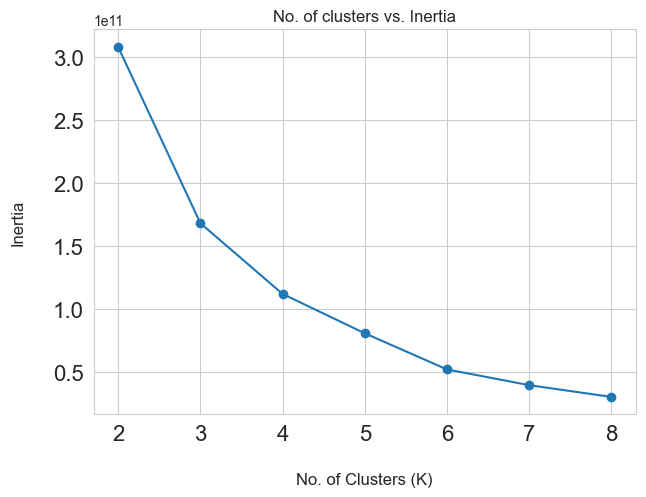

In [28]:
from sklearn.cluster import KMeans

options = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(X)
    inertias.append(model.inertia_)

plt.figure(figsize=(7,5))    
plt.title("No. of clusters vs. Inertia")
plt.plot(options, inertias, '-o')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16)
plt.xlabel('No. of Clusters (K)', fontsize=12, labelpad=20)
plt.ylabel('Inertia', fontsize=12, labelpad=20);

In [29]:
model = KMeans(n_clusters=4, init='k-means++', random_state=42).fit(X)

preds = model.predict(X)

customer_kmeans = X.copy()
customer_kmeans['clusters'] = preds

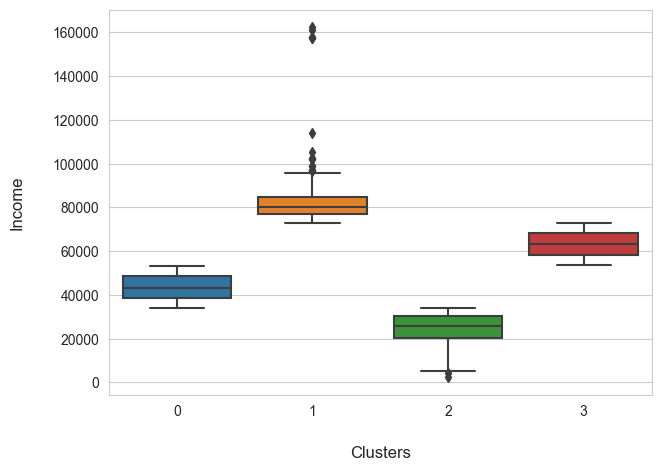

In [30]:
sns.set_style('whitegrid')
plt.figure(figsize=(7,5))

sns.boxplot(data=customer_kmeans, x='clusters', y = 'Income');
plt.xlabel('Clusters', fontsize=12, labelpad=20)
plt.ylabel('Income', fontsize=12, labelpad=20);

In [31]:
customer_kmeans.clusters = customer_kmeans.clusters.replace({0: 'Potential',
                                                             1: 'Elite',
                                                             2: 'Ordinary',
                                                             3: 'Good'})

df['clusters'] = customer_kmeans.clusters

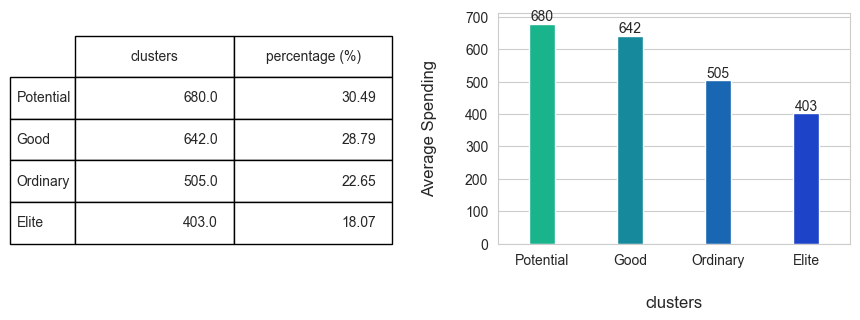

In [32]:
table_countplot(df, 'clusters')

- Clusters seem to be fairly distributed

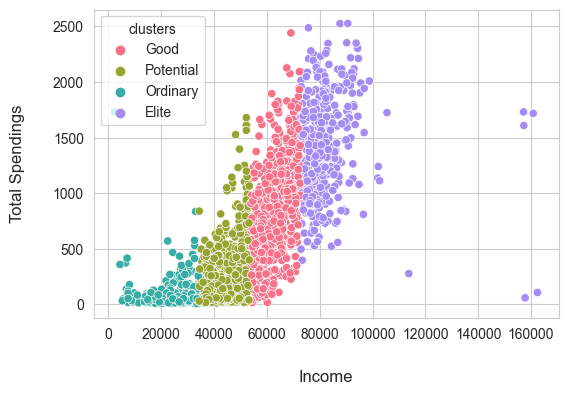

In [33]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Income', y='Total_spending', hue='clusters', palette='husl');
plt.xlabel('Income', fontsize=12, labelpad=20)
plt.ylabel('Total Spendings', fontsize=12, labelpad=20);

<Figure size 1000x800 with 0 Axes>

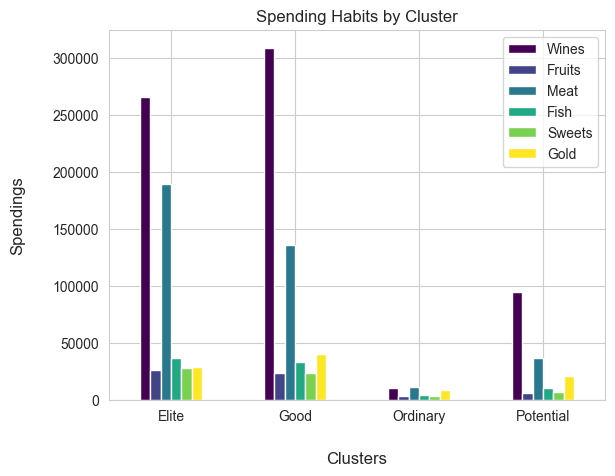

In [34]:
cluster_spendings = df.groupby('clusters')[['Wines', 'Fruits','Meat', 
                                                  'Fish', 'Sweets', 'Gold']].sum()

plt.figure(figsize=(10,8))
cluster_spendings.plot(kind='bar', cmap = 'viridis')

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=12, labelpad=20)
plt.ylabel('Spendings', fontsize=12, labelpad=20);
plt.xticks(rotation=0, ha='center');
plt.show()

<Figure size 1000x800 with 0 Axes>

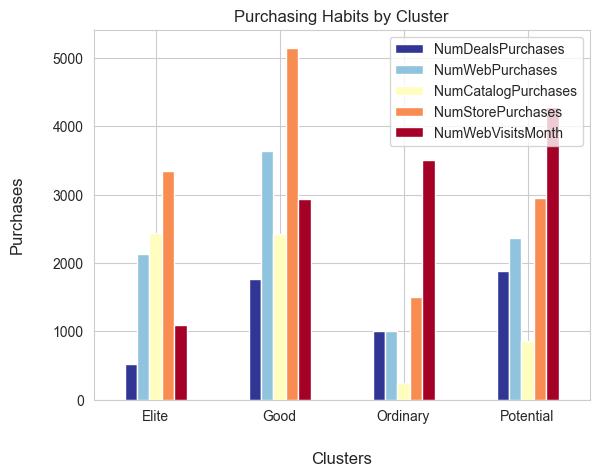

In [35]:
cluster_purchases = df.groupby('clusters')[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                                                  'NumStorePurchases', 'NumWebVisitsMonth']].sum()

plt.figure(figsize=(10,8))
cluster_purchases.plot(kind='bar', cmap= 'RdYlBu_r')

plt.title('Purchasing Habits by Cluster')
plt.xlabel('Clusters', fontsize=12, labelpad=20)
plt.ylabel('Purchases', fontsize=12, labelpad=20);
plt.xticks(rotation=0, ha='center');

<Figure size 1000x800 with 0 Axes>

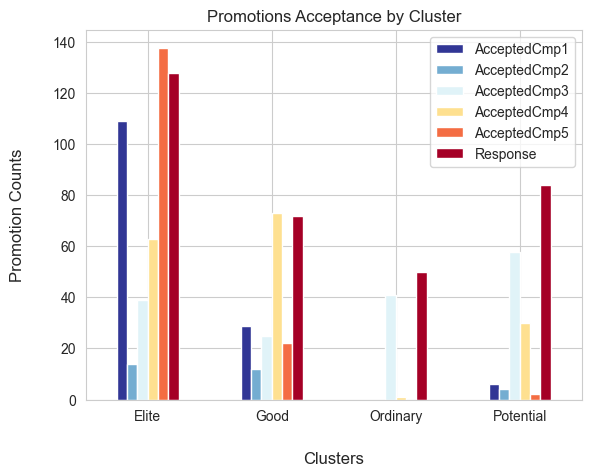

In [36]:
cluster_campaign = df.groupby('clusters')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
                                                  'AcceptedCmp5', 'Response']].sum()

plt.figure(figsize=(10,8))
cluster_campaign.plot(kind='bar', cmap = 'RdYlBu_r')

plt.title('Promotions Acceptance by Cluster')
plt.xlabel('Clusters', fontsize=12, labelpad=20)
plt.ylabel('Promotion Counts', fontsize=12, labelpad=20);
plt.xticks(rotation=0, ha='center');
plt.show()

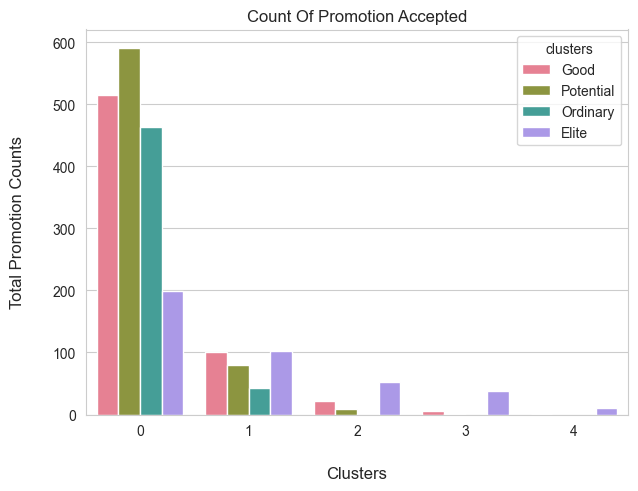

In [37]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure(figsize=(7,5))
ax = sns.countplot(x=df["Total_Promos"],hue=df["clusters"], palette= 'husl')
ax.set_title("Count Of Promotion Accepted")
plt.xlabel('Clusters', fontsize=12, labelpad=20)
plt.ylabel('Total Promotion Counts', fontsize=12, labelpad=20);
plt.show()